In [1]:
suppressPackageStartupMessages(library(plyr))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(patchwork))

library(ggplot2)
library(ggpubr)
is_dark_color <- function(hex) {
  rgb <- col2rgb(hex)
  
  luminance <- 0.299 * rgb[1,] + 0.587 * rgb[2,] + 0.114 * rgb[3,]
  if(luminance < 128){
  return('white')
  }else{return('black')}
}

color_annotation <- read.csv('../Color_hex_codes/Cell_Type_Color_Annotation_and_Order.csv')
color_vector <- setNames(color_annotation$color, color_annotation$label)

Warning message:
“package ‘plyr’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.3”
Warning message:
“package ‘tidyr’ was built under R version 4.3.3”
Warning message:
“package ‘tibble’ was built under R version 4.3.3”
Warning message:
“package ‘patchwork’ was built under R version 4.3.3”

Attaching package: ‘ggpubr’


The following object is masked from ‘package:plyr’:

    mutate




In [2]:
df<-read.csv("07_Flow_CD40LG_MFI/CD40L MFI on 24hr CD4 populations.xlsx - 24hr CD4 Populations.csv")

In [3]:
colnames(df)[1]<-"DonorID"

In [4]:
df<-df %>% mutate(`Age Group`=case_when(startsWith(DonorID,"BR1") ~"Young" , TRUE ~"Older"))
df$`Age Group`<-factor(df$`Age Group`,levels=c("Young","Older"))

In [5]:
write.csv(df %>% select(DonorID,`Age Group`,Batch.ID,CD27.CD4.EM.CD40L.MFI,CD27..CD4.EM.CD40L.MFI,CD4.CM	),
          "/home//workspace/Source_Data/Extended_Fig8h.csv",
          row.names=FALSE)

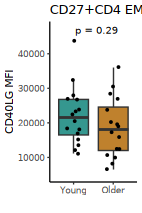

In [9]:
options(repr.plot.width = 30/25.4, repr.plot.height = 45/25.4)

p1<-ggplot(df, aes(x=`Age Group`, y=`CD27.CD4.EM.CD40L.MFI`, fill=`Age Group`)) +
    geom_boxplot(outlier.shape = NA,lwd=0.3) +
geom_point(position = position_jitter(width = 0.2),color="black", size=0.8,stroke=0) +
theme_classic(base_size=6)+  
stat_compare_means(aes(label = paste0("p = ", after_stat(p.format))),
    size=2,
    label.x=1.25,  
    vjust = -1)+theme(strip.background = element_rect(linewidth = 0))+
    scale_fill_manual(values = c("Older" = '#bf812d', "Young" = '#35978f'))+
    scale_y_continuous(limits = c(NA, NA), 
                       expand = expansion(mult = c(0.1, 0.15)))+
theme(legend.position="none")+
xlab('')+
ylab('CD40LG MFI')+ggtitle("CD27+CD4 EM")
p1

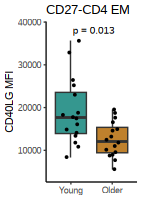

In [14]:
options(repr.plot.width = 30/25.4, repr.plot.height = 45/25.4)

p2<-ggplot(df, aes(x=`Age Group`, y=`CD27..CD4.EM.CD40L.MFI`, fill=`Age Group`)) +
    geom_boxplot(outlier.shape = NA,lwd=0.3) +
geom_point(position = position_jitter(width = 0.2),color="black", size=0.8,stroke=0) +
theme_classic(base_size=6)+  
stat_compare_means(aes(label = paste0("p = ", after_stat(p.format))),
    size=2,
    label.x=1.25,  
    vjust = -1)+theme(strip.background = element_rect(linewidth = 0))+
    scale_fill_manual(values = c("Older" = '#bf812d', "Young" = '#35978f'))+
    scale_y_continuous(limits = c(NA, NA), 
                       expand = expansion(mult = c(0.1, 0.15)))+
theme(legend.position="none")+
xlab('')+
ylab('CD40LG MFI')+ggtitle("CD27-CD4 EM")
p2

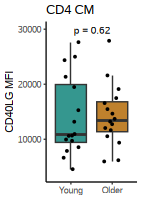

In [15]:
options(repr.plot.width = 30/25.4, repr.plot.height = 45/25.4)

p3<-ggplot(df, aes(x=`Age Group`, y=`CD4.CM`, fill=`Age Group`)) +
    geom_boxplot(outlier.shape = NA,lwd=0.3) +
geom_point(position = position_jitter(width = 0.2),color="black", size=0.8,stroke=0) +
theme_classic(base_size=6)+  
stat_compare_means(aes(label = paste0("p = ", after_stat(p.format))),
    size=2,
    label.x=1.25,  
    vjust = -1)+theme(strip.background = element_rect(linewidth = 0))+
    scale_fill_manual(values = c("Older" = '#bf812d', "Young" = '#35978f'))+
    scale_y_continuous(limits = c(NA, NA), 
                       expand = expansion(mult = c(0.1, 0.15)))+
theme(legend.position="none")+
xlab('')+
ylab('CD40LG MFI')+ggtitle("CD4 CM")
p3

In [21]:
options(repr.plot.width = 80/25.4, repr.plot.height = 45/25.4)

p<-p1+p2+p3
ggsave("FigureJ.pdf",
       p,
       width=80/25.4,
       height = 45/25.4)
